# Step 01: Regression

In [3]:
import pandas as pd
df1 = pd.read_csv('weight-height.csv')
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df2 = df1.copy()

2. Separate x(Gender, Height) and y (y=Weight)
3. Train = 70%, Test = 30%
4. Apply Linear Regression
5. Evaluate the Model (Testing and training Accuracy, MSE for testing)
6. Apply KNN Regressor: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
7. Evaluate the Model (Testing and training Accuracy, MSE for testing)
8. Compare KNN & Linear regression with the KNN model and Linear regression as well.


Work from here..

In [44]:
x = df2[["Height"]] # define x = height
y = df2[["Weight"]] # define y = weight

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, train_size=.7,random_state=1) # split test and train size to 30% and 70% 

In [9]:
xtrain.shape

(5988, 1)

In [10]:
xtest.shape

(2567, 1)

In [11]:
ytrain.shape

(5988, 1)

In [12]:
ytest.shape

(2567, 1)

In [13]:
#linear regression
from sklearn.linear_model import LinearRegression #import linear regression model
lr = LinearRegression() # create linear regression object

In [14]:
lr

LinearRegression()

In [15]:
lr.fit(xtrain,ytrain) # train data

LinearRegression()

In [16]:
lr.score(xtrain,ytrain) #calculate accuracy of train data. 1 is perfect

0.8486997810516949

In [17]:
lr.score(xtest, ytest) #calculate accuracy of test data. 1 is perfect

0.8588721747814503

In [18]:
lr.predict([[71.730978]]) #predict one fixed value

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[203.2042474]])

In [19]:
df2["predict"] = lr.predict(df2[["Height"]]) # predit height with LR model

In [20]:
df2.head() # show with predict value

,Gender,Height,Weight,predict
0,Male,73.847017,241.893563,219.414315
1,Male,68.781904,162.310473,180.612657
2,Male,74.110105,212.740856,221.429722
3,Male,71.730978,220.042470,203.204250
4,Male,69.881796,206.349801,189.038456


In [21]:
df2["error"]= df2["Weight"] - df2["predict"] # calculate error for each weight
df2.head()

,Gender,Height,Weight,predict,error
0,Male,73.847017,241.893563,219.414315,22.479249
1,Male,68.781904,162.310473,180.612657,-18.302185
2,Male,74.110105,212.740856,221.429722,-8.688866
3,Male,71.730978,220.042470,203.204250,16.838220
4,Male,69.881796,206.349801,189.038456,17.311344


In [22]:
pre = lr.predict(xtest) # predict test data
pre

array([[152.16232007],
       [196.26120163],
       [179.70633394],
       ...,
       [173.8235161 ],
       [182.52135569],
       [201.25174619]])

In [23]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'conbination of hegit and weight')

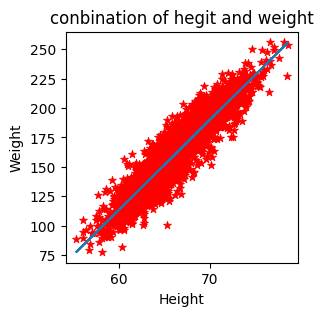

In [24]:
plt.figure(figsize=(3,3))
plt.scatter(xtest,ytest, color ="r",marker= "*", linewidths= .55)
plt.plot(xtest, lr.predict(xtest)) # scatter plot with best fit line with xtest data
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("conbination of hegit and weight")

Text(0.5, 1.0, 'conbination of hegit and weight')

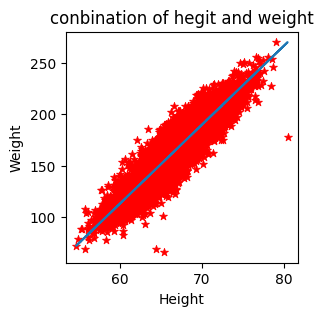

In [25]:
plt.figure(figsize=(3,3))
plt.scatter(df2["Height"], df2["Weight"], color ="r",marker= "*", linewidths= .55)
plt.plot(xtrain, lr.predict(xtrain)) # plot scatter plot with best fit line for xtrain data
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("conbination of hegit and weight")

Text(0.5, 1.0, 'conbination of hegit and weight')

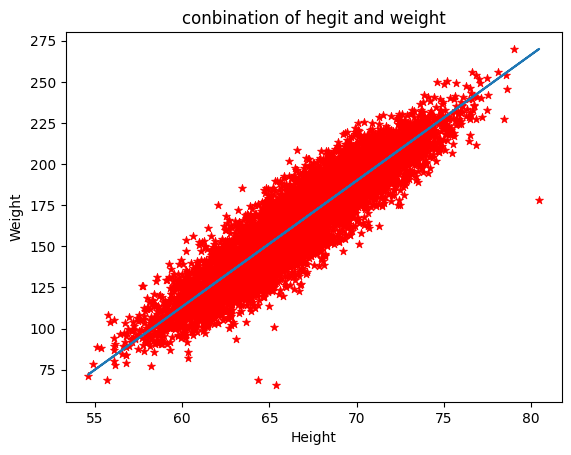

In [31]:
plt.scatter(x,y, color ="r",marker= "*", linewidths= .55)
plt.plot(x, lr.predict(x)) # for x data
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("conbination of hegit and weight")

In [31]:
from sklearn.metrics import mean_squared_error as mse # import MSE
from sklearn.metrics import mean_absolute_error as mae # import MAE

In [32]:
test_mse = mse(xtest, lr.predict(xtest))  # Calculate MSE
test_mse

10439.505378553476

In [34]:
train_mse= mse(xtrain, lr.predict(xtrain)) #to measure test MSE
train_mse

10381.554088448316

In [36]:
test_mae= mae(ytest, lr.predict(xtest)) #to measure test mae
test_mae

9.79082012333304

In [37]:
train_mae= mae(xtrain, lr.predict(xtrain)) #to measure test mae
test_mae

9.79082012333304

In [38]:
#y = mx + c

m = lr.coef_ # slop
c = lr.intercept_ #intercept

In [39]:
m

array([[7.660571]])

In [40]:
c

array([-346.29600266])

In [41]:
y = m * 68.781904	 + c # check for the fixed x value
y

array([[180.61265663]])

In [42]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)

In [45]:
neigh.fit(x, y)

KNeighborsRegressor()

In [47]:
print(neigh.predict(x))

[[221.32534786]
 [178.67678294]
 [220.77880708]
 ...
 [156.19188812]
 [163.98789798]
 [118.24222614]]


In [48]:
df2["KNN Predict"]= neigh.predict(x) # KNN predict 
df2.head()

,Gender,Height,Weight,predict,error,KNN Predict
0,Male,73.847017,241.893563,219.414315,22.479249,221.325348
1,Male,68.781904,162.310473,180.612657,-18.302185,178.676783
2,Male,74.110105,212.740856,221.429722,-8.688866,220.778807
3,Male,71.730978,220.042470,203.204250,16.838220,202.632591
4,Male,69.881796,206.349801,189.038456,17.311344,194.285950


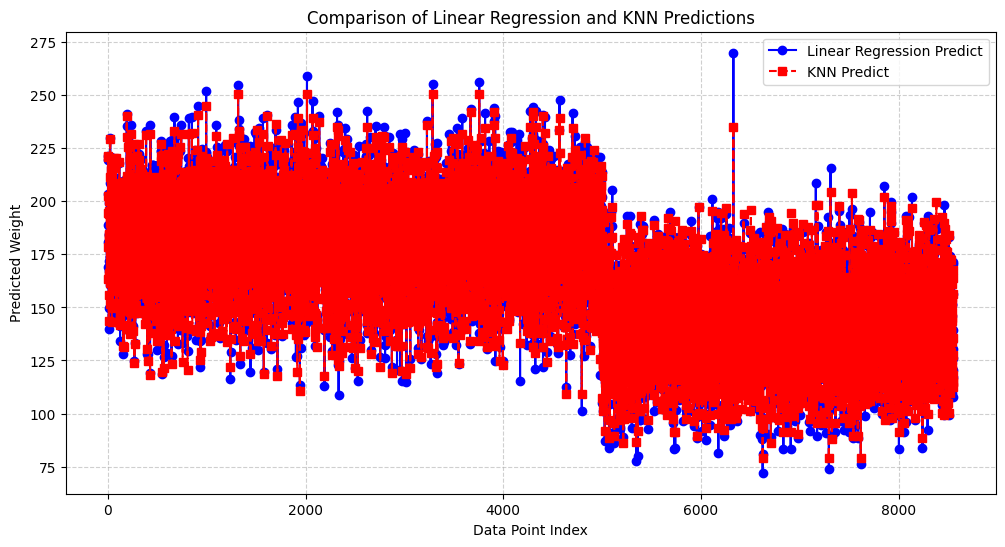

In [49]:
plt.figure(figsize=(12, 6))

# Plot Linear Regression Predictions
plt.plot(df2.index, df2['predict'], label='Linear Regression Predict', marker='o', linestyle='-', color='blue')

# Plot KNN Predictions
plt.plot(df2.index, df2['KNN Predict'], label='KNN Predict', marker='s', linestyle='--', color='red')

plt.xlabel("Data Point Index")
plt.ylabel("Predicted Weight")
plt.title("Comparison of Linear Regression and KNN Predictions")

plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

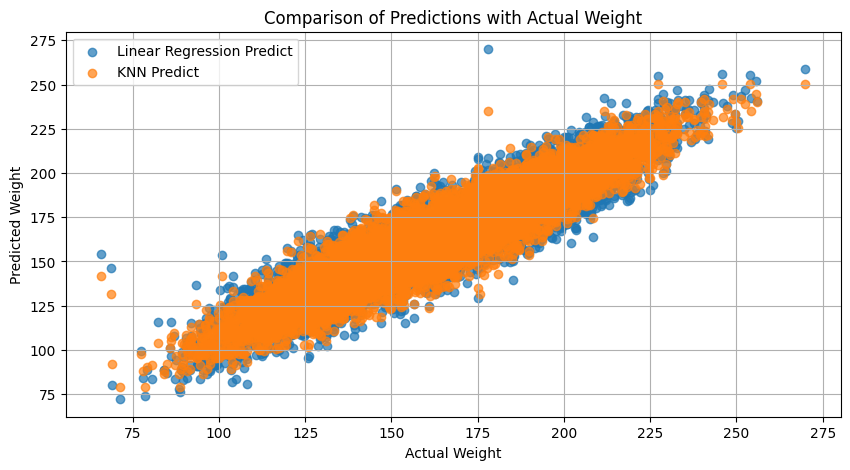

In [50]:
plt.figure(figsize=(10, 5))
plt.scatter(df2['Weight'], df2['predict'], label='Linear Regression Predict', alpha=0.7)
plt.scatter(df2['Weight'], df2['KNN Predict'], label='KNN Predict', alpha=0.7)

plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Comparison of Predictions with Actual Weight")
plt.legend()
plt.grid()

plt.show()

# Step 02: Classification

In [53]:
df3 = df1.copy()

In [54]:
df3.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


2. Separate x and (y=Gender)
3. Train = 70%, Test = 30%
4. Apply KNN Classifier
5. Evaluate the Model by only Accuracy.
6. Apply KNN Classifier: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Work from here..

In [67]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

In [55]:
df3.shape

(8555, 3)

In [57]:
df3['Gender'].value_counts()

Gender
Male      5000
Female    3555
Name: count, dtype: int64

In [58]:
df3['Gender'].isnull().sum()

np.int64(0)

In [59]:
df3.Gender = df3.Gender.replace(['Male','Female'],[0,1])
df3.head()

C:\Users\user\AppData\Local\Temp\ipykernel_19964\2502139003.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df3.Gender = df3.Gender.replace(['Male','Female'],[0,1])


,Gender,Height,Weight
0,0,73.847017,241.893563
1,0,68.781904,162.310473
2,0,74.110105,212.740856
3,0,71.730978,220.042470
4,0,69.881796,206.349801


In [60]:
x = df3[['Height', 'Weight']]  # Features x
y = df3['Gender']  # Target y

In [61]:
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [62]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Gender, dtype: int64

In [63]:
x.shape

(8555, 2)

In [64]:
y.shape

(8555,)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

k=1, Model Accuracy: 0.8711, F1 Score: 0.8670
k=2, Model Accuracy: 0.8792, F1 Score: 0.8722
k=3, Model Accuracy: 0.9014, F1 Score: 0.8984
k=4, Model Accuracy: 0.9022, F1 Score: 0.8981
k=5, Model Accuracy: 0.9131, F1 Score: 0.9103
k=6, Model Accuracy: 0.9100, F1 Score: 0.9064
k=7, Model Accuracy: 0.9178, F1 Score: 0.9151
k=8, Model Accuracy: 0.9159, F1 Score: 0.9128
k=9, Model Accuracy: 0.9178, F1 Score: 0.9152
k=10, Model Accuracy: 0.9151, F1 Score: 0.9120
k=11, Model Accuracy: 0.9186, F1 Score: 0.9159
k=12, Model Accuracy: 0.9170, F1 Score: 0.9141
k=13, Model Accuracy: 0.9186, F1 Score: 0.9160
k=14, Model Accuracy: 0.9190, F1 Score: 0.9162
k=15, Model Accuracy: 0.9198, F1 Score: 0.9172
k=16, Model Accuracy: 0.9198, F1 Score: 0.9171
k=17, Model Accuracy: 0.9205, F1 Score: 0.9180
k=18, Model Accuracy: 0.9205, F1 Score: 0.9179
k=19, Model Accuracy: 0.9198, F1 Score: 0.9172
k=20, Model Accuracy: 0.9198, F1 Score: 0.9171
k=21, Model Accuracy: 0.9201, F1 Score: 0.9176
k=22, Model Accuracy: 

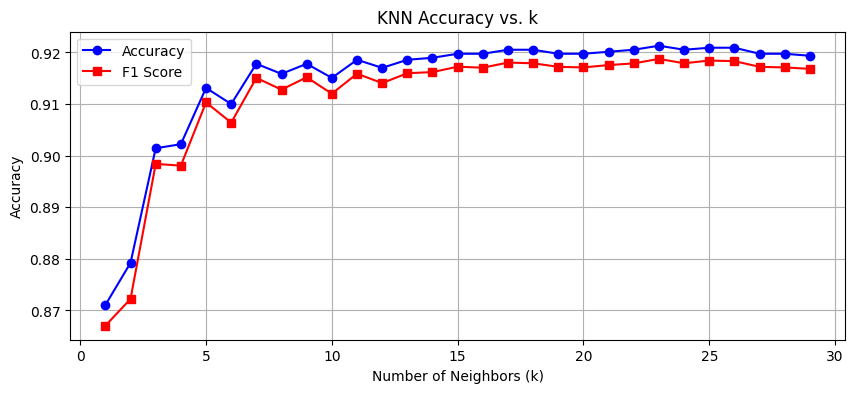

'plt.figure(figsize=(10, 4))\nplt.plot(k_values, f1_scores, marker=\'s\', linestyle=\'-\', color=\'r\', label="F1 Score")\nplt.xlabel("Number of Neighbors (k)")\nplt.ylabel("F1 Score")\nplt.title("KNN F1 Score vs. k")\nplt.legend()\nplt.grid(True)\nplt.show()'

In [76]:
# Lists to store k values and corresponding accuracy & F1 scores
k_values = list(range(1, 30))
accuracy_scores = []
f1_scores = []

for i in k_values:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)  # Avoid division errors and for using multiple class

    accuracy_scores.append(accuracy)
    f1_scores.append(f1)

    # Print k, Accuracy, and F1 Score
    print(f"k={i}, Model Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}") # print 4 digit after decimal point

# Plot Accuracy
plt.figure(figsize=(10, 4))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b', label="Accuracy") # plot accuracy score
plt.plot(k_values, f1_scores, marker='s', linestyle='-', color='r', label="F1 Score") # plot f1 score
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. k")
plt.legend()
plt.grid(True)
plt.show()

In [77]:
# Create a DataFrame for visualization
heatmap_data = pd.DataFrame({'Accuracy': accuracy_scores, 'F1 Score': f1_scores}, index=k_values)
heatmap_data.head()

,Accuracy,F1 Score
1,0.871056,0.867042
2,0.879236,0.872233
3,0.901441,0.898402
4,0.902220,0.898070
5,0.913128,0.910323


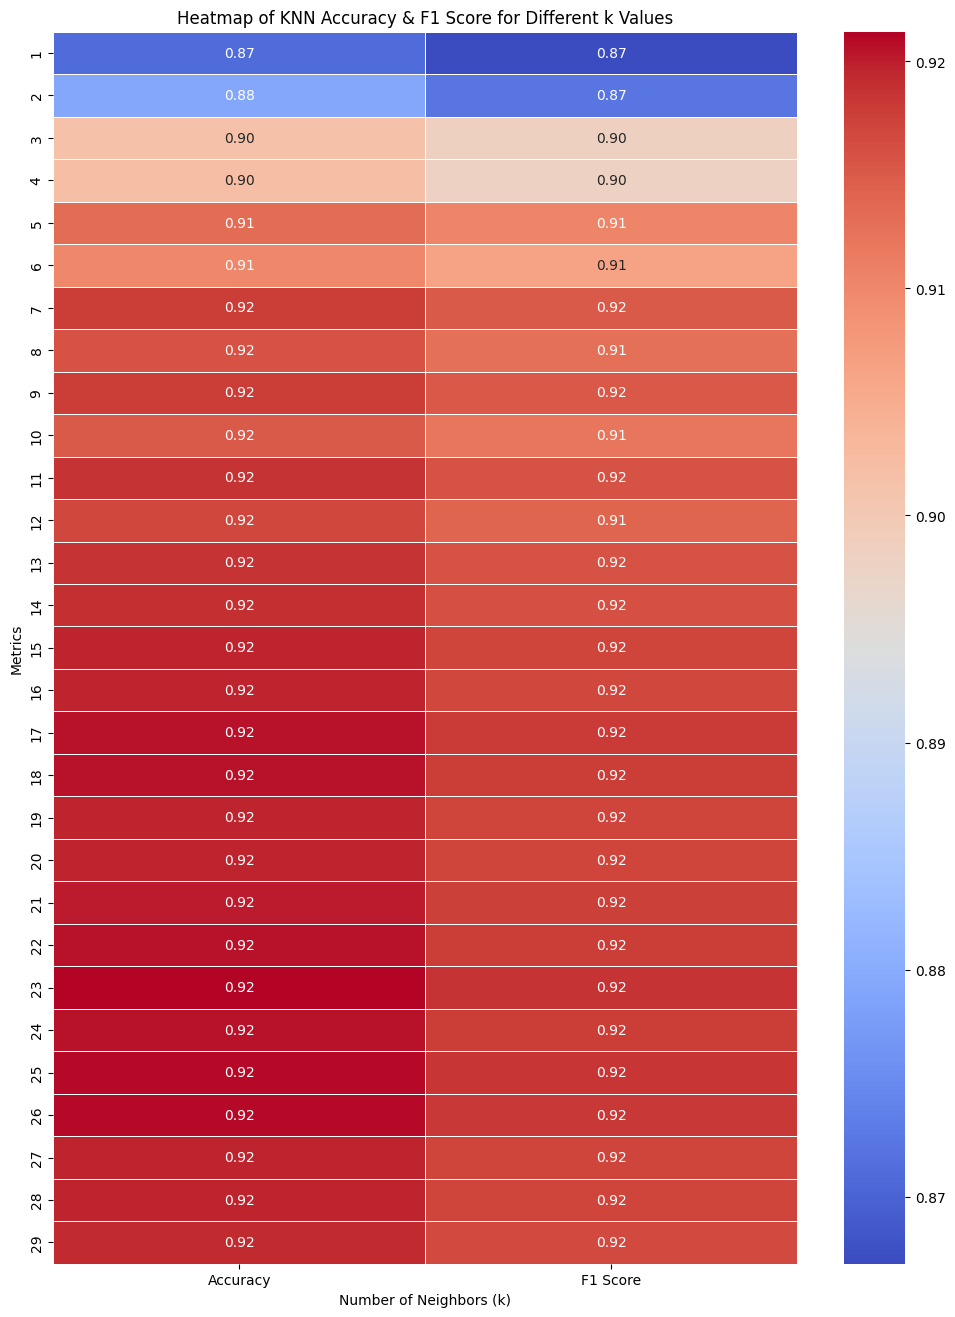

In [83]:
# Plot the heatmap
plt.figure(figsize=(12, 16))
sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Metrics")
plt.title("Heatmap of KNN Accuracy & F1 Score for Different k Values")

plt.show()

In [69]:
# Define KNN model with k=23 
knn = KNeighborsClassifier(n_neighbors=23)

In [70]:
# Train the model
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=23)

In [71]:
# make predictions
y_pred = knn.predict(x_test)

In [72]:
# calculte model accuracy
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)  

print(f"Model Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Model Accuracy: 0.9213089209193611
F1 Score: 0.9043560606060606


In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

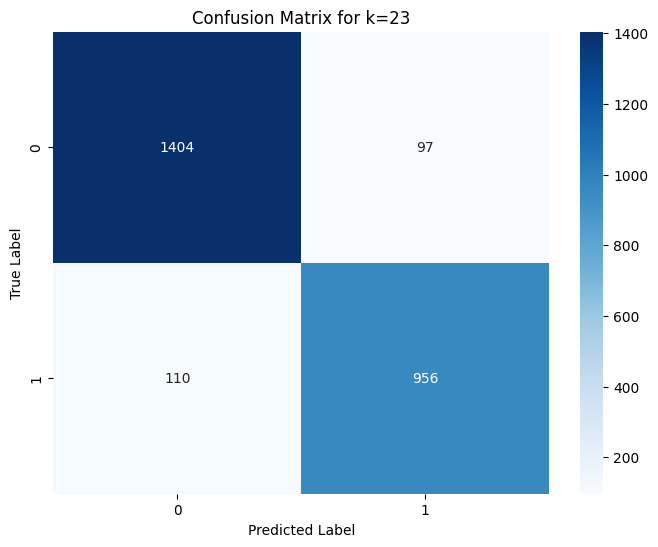

In [85]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title(f"Confusion Matrix for k={23}")
plt.show()